# **Evaluating the model with the full chembl compound set, comprising actives and decoys**

In [1]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import (
    confusion_matrix, 
    precision_score, 
    recall_score,
    accuracy_score, 
    average_precision_score, 
    balanced_accuracy_score,
    f1_score
)
from imblearn.metrics import specificity_score

In [2]:
data = pickle.load(open('/home/yangxin/Desktop/script_rdrp/prepared_model/optimized_model.pkl', 'rb'))


model = data['model']    
threshold = data['threshold']  

In [3]:
test_all = pd.read_csv('/home/yangxin/Desktop/script_rdrp/dataset/test_all_set')
x = test_all.iloc[:,1:]
y= test_all['class']

In [4]:
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
x = selection.fit_transform(x)
x.shape

(4437, 23)

In [5]:
probabilities = model.predict_proba(x)[:,0]
y_pred = np.where(probabilities > threshold, "active", "inactive")
print(y_pred)
df_final = pd.DataFrame(y_pred)

['inactive' 'inactive' 'active' ... 'inactive' 'inactive' 'inactive']


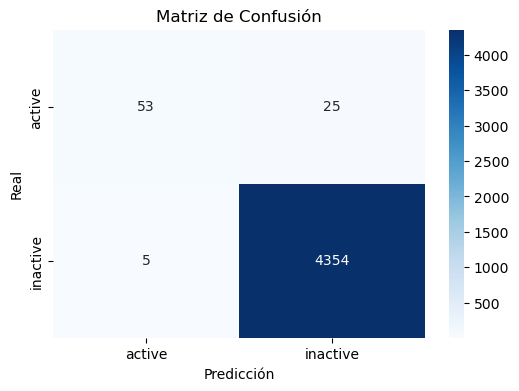

In [6]:
cm_2 = confusion_matrix(y, df_final)

plt.figure(figsize=(6,4))
sns.heatmap(cm_2, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

In [7]:
accuracy = accuracy_score(y,y_pred)
precision = precision_score(y,y_pred, pos_label='active')
recall = recall_score(y,y_pred, pos_label='active')
specificity = specificity_score(y,y_pred, pos_label='active')
f1 = f1_score(y,y_pred, pos_label='active')

df_test = pd.DataFrame({
    'accuracy': [accuracy],
    'precision': [precision],
    'recall': [recall],
    'specificity': [specificity],
    'f1': [f1]
}, index=['test'])

In [8]:
df_test

,accuracy,precision,recall,specificity,f1
test,0.993239,0.913793,0.679487,0.998853,0.779412
